In [5]:
import yaml
from scipy.ndimage import map_coordinates
import pickle
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
import matplotlib as mpl
from astropy import constants, units
from mpl_toolkits.axes_grid1 import make_axes_locatable
import imageio

from scripts.plot_utils import *

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.size'] = 20
path = '/Users/arcticfox/Documents/disks/models'
parula = np.load('/Users/arcticfox/parula_colors.npy')

output_labels = [r'$\rho_{dust, small}$ [cm$^{-3}$]',
                 r'$\rho_{dust, large}$ [cm$^{-3}$]',
                 'T$_{dust, small}$ [K]',
                 'T$_{dust, large}$ [K]',
                 r'$\rho_{gas}$ [cm$^{-3}$]',
                 'T$_{gas}$ [K]',
                 'P$_{gas}$ [J cm$^{-3}$]']

outputs = ['rhodustsm', 'rhodustlg', 'tdustsm', 'tdustlg', 'rhogas', 'tgas', 'pressure']
colors = ['deepskyblue', 'maroon', 'darkorange', 'xkcd:cornflower', 'gold']
tick_list = [0, 0, tdust_ticks, tdust_ticks, dgas_ticks, tgas_ticks, p_ticks]

In [6]:
tab = Table.read('params_per_step.tab',format='ascii')
model = np.load('outburst_model.npy',allow_pickle=True)

data_folders = []#['twhydrae/baseline']
for i in range(10):
    data_folders.append('twhydrae/step_{0:02d}'.format(i))
    
labels = []#['L = L$_B = $0.54 L$_\odot$']
for i in range(10):
    labels.append('L = {}L$_B$'.format(np.round(tab['Lfactor'][i],2)))

data_paths = [os.path.join(path, i) for i in data_folders]

tdust_ticks = np.linspace(10,500,9)
tgas_ticks = np.linspace(10,500,9)
dgas_ticks = np.logspace(1,14,9)
p_ticks = 10**np.linspace(8,20,9)
ddust_ticks = np.logspace(-22,-14,9)
ylim=[0,3]

In [7]:
def make_subplots(data_paths, labels, transparent=False, xlim=[0,10], ylim=[0,1]):
    fig, axes = plt.subplots(ncols=4, nrows=len(data_paths), 
                             figsize=(8*len(data_paths), 6*len(data_paths)), sharex=True)
    
    if transparent==False:
        fig.set_facecolor('w')
    
    i = 0
    x = 0
    data = [open_interp(j) for j in data_paths]
    
    add_cbar, add_xlabel = True, False
    for ax in axes.reshape(-1):
        
        if i>3:
            add_cbar=False
        if i > 3+4*np.arange(0,len(data_paths),1)[-2]:
            add_xlabel=True
        
        if i in 0+4*np.arange(0,len(data_paths),1):
            plot_contour(data[x], 'RdYlBu_r', ticks=tdust_ticks, 
                         ax=ax, label='T$_{dust, lg}$ [K]',
                         index=3,ylim=ylim,add_cbar=add_cbar,
                         add_xlabel=add_xlabel, xlim=xlim)
            ax.set_ylabel('{}'.format(labels[x]),fontsize=26)
            
        if i in 1+4*np.arange(0,len(data_paths),1):
            plot_contour(data[x], 'RdYlBu_r', ticks=tgas_ticks, 
                         ax=ax, label='T$_{gas}$ [K]', 
                         skipticks=4,ylim=ylim,add_cbar=add_cbar,
                         add_xlabel=add_xlabel, xlim=xlim)
            
        if i in 2+4*np.arange(0,len(data_paths),1):
            plot_contour(data[x], 'viridis', ticks=p_ticks, 
                         ax=ax, label=r'$P_{gas}$ [J cm$^{-3}$]',
                         logNorm=True,ylim=ylim,pressure=True,
                         add_cbar=add_cbar, add_xlabel=add_xlabel, xlim=xlim)
        if i in 3+4*np.arange(0,len(data_paths),1):
            plot_contour(data[x], 'plasma', ticks=dgas_ticks, 
                         ax=ax, label=r'$\rho_{gas}$ [cm$^{-3}$]',
                         index=4, logNorm=True,ylim=ylim,
                         add_cbar=add_cbar, add_xlabel=add_xlabel, xlim=xlim)

        if i >= 3+4*np.arange(0,len(data_paths),1)[x]:
            x += 1
        i += 1
        
        ax.set_rasterized(True)
    #ax.set_xlim(0,300)
    return fig

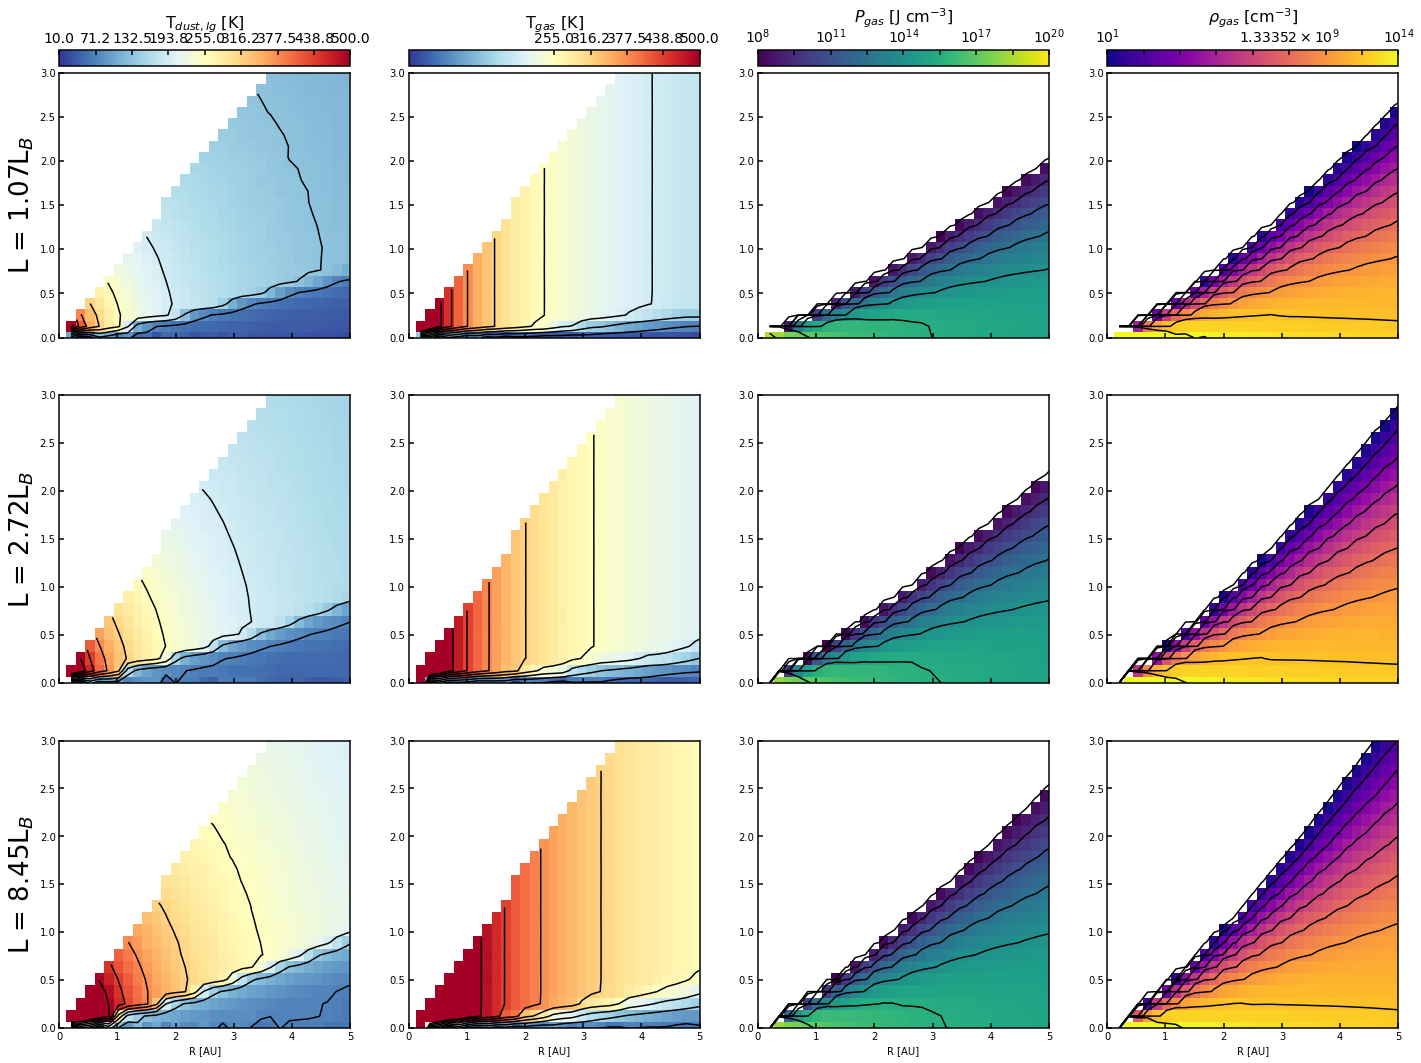

In [4]:
fig = make_subplots(data_paths[0:3],labels[0:3],
                    xlim=[0,5], ylim=[0,3])

fig.savefig('/Users/arcticfox/Desktop/twyhdrae_Hc_Tcatm_inner_way_inner.png',
            rasterize=True, bbox_inches='tight', dpi=250)

## Images for GIFs

In [ ]:
data = [open_interp(j) for j in data_paths]
for i in range(len(tab)):
    fig,(ax1,ax)=plt.subplots(figsize=(16,4),ncols=2,
                              gridspec_kw={'width_ratios':[1,3]})
    fig.set_facecolor('w')
    
    ax1.plot(model[0]-model[0][0],model[1],'k',lw=3)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('L$_{outburst}$ / L$_{baseline}$')
    ax1.plot(model[0][tab['args'][i]]-model[0][0], model[1][tab['args'][i]],
             'o',ms=10,color='darkorange')
    
    plot_contour(data[i], 'plasma',
                 index=4,
                 ticks=np.logspace(0,14,9),
                 ax=ax, label=r'$\rho_{gas}$ [cm$^{-3}$]', 
                 skipticks=0,ylim=[0,5],
                 add_cbar=True,logNorm=True,
                 add_xlabel=True, xlim=[0,10])
    ax.set_ylabel('Z [AU]')
    plt.savefig('/Users/arcticfox/Documents/disks/figures/steps/step_{0:02d}_rhogas.png'.format(i),
                dpi=300, rasterize=True, bbox_inches='tight')
    plt.close()

In [ ]:
pth = '/Users/arcticfox/Documents/disks/figures/steps/'

filenames = np.sort([os.path.join(pth,i) for i in os.listdir(pth) if i.endswith('rhogas.png')])
frames = []

for filename in filenames:
    frames.append(imageio.imread(filename))
exportname = "/Users/arcticfox/Documents/disks/figures/steps/rhogas.gif"
kargs = { 'duration': 0.5 }
imageio.mimsave(exportname, frames, 'GIF', **kargs)

##### ['rhodustsm', 'rhodustlg', 'tdustsm', 'tdustlg', 'rhogas', 'tgas', 'pressure']

In [ ]:
def comp_line_plot(dp1, dp2, 
                   indices=[0, 1, 5, 2, 4, 6], 
                   zrs=[0,0.1,0.2,0.3,0.4],
                   colors=['deepskyblue', 'maroon', 'darkorange', 'xkcd:cornflower', 'gold'],
                   ylabel='% Difference', log=False):
    
    fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(21,10), 
                             sharex=True)
    ax = axes.reshape(-1)
    fig.set_facecolor('w')

    d1 = np.array(open_raw(dp1))
    d2 = np.array(open_raw(dp2))
    
    for i in range(len(ax)):
    
        if indices[i] != 6:
            rr1, zz1, dd1 = make_line_profiles(d1, indices[i], zrs=zrs)
            rr2, zz2, dd2 = make_line_profiles(d2, indices[i], zrs=zrs)
        else:
            p1 = pressure_profile(d1[4], d1[5], mu=2.3).value
            rr1, zz1, dd1 = make_line_profiles(d1, indices[i], p=p1, zrs=zrs)

            p2 = pressure_profile(d2[4], d2[5], mu=2.3).value
            rr2, zz2, dd2 = make_line_profiles(d2, indices[i], p=p2, zrs=zrs)

        ax[i].set_title(output_labels[indices[i]])

        for j in range(len(rr1)):
            
            if log == True and (indices[i] == 0 or indices[i] == 1):
                diff = (np.log10(dd2[j])-np.log10(dd1[j])) / np.log10(dd2[j]) * 100
                ax[i].set_ylim(-100,100)
            else:
                diff = (dd2[j]-dd1[j])/dd2[j]*100
                
                if indices[i] == 2 or indices[i] == 4:
                    ax[i].set_ylim(-50,100)
                else:
                    ax[i].set_ylim(-100,100)

            mask = (np.isnan(diff)==False) & (np.isfinite(diff)==True)
            if  i < 5:
                ax[i].plot(rr1[j][mask], diff[mask], c=colors[j], lw=6)
            else:
                ax[i].plot(rr1[j][mask], diff[mask], c=colors[j], lw=6,
                           label=zrs[j])

        if i == 5:
            leg = ax[i].legend(bbox_to_anchor=(1.05, 1), 
                               loc='upper left', borderaxespad=0.)
            leg.set_title('z/r')
        if i >= 3:
            ax[i].set_xlabel('R [AU]', fontsize=24)
        if i == 3:# or i ==0:
            ax[i].set_ylabel(ylabel, fontsize=24, y=1.1)

        ax[i].set_rasterized(True)
    return fig

In [ ]:
colors=['deepskyblue', 'maroon', 'darkorange', 'xkcd:cornflower', 'gold']
ind1, ind2 = -2, 0
fig = comp_line_plot(data_paths[ind1], data_paths[ind2],  
                     ylabel='{0} vs. {1}'.format(labels[ind1], labels[ind2]),
                     log=True)
#plt.savefig('/Users/arcticfox/Documents/disks/figures/twhydrae_{0}_{1}.png'.format(save_labels[ind1],
#                                                                                   save_labels[ind2]),
#            rasterize=True, bbox_inches='tight', dpi=250)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14,4),
                                    sharex=True, sharey=True)
fig.set_facecolor('w')
for j, ax in enumerate([ax1,ax2,ax3]):
    if j >=1:
        j += 2
    d_tw = open_raw(data_paths[j])
    index = 0
    rrs, zzs, dds = make_line_profiles(d_tw, index)

    for i in range(len(rrs)):
        q = dds[i] > 0
        ax.plot(rrs[i][q], dds[i][q], c=colors[i], lw=3)
    if j == 0:
        ax.set_ylabel(output_labels[index])
    ax.set_title(labels[j])
    ax.set_xlabel('R [AU]')
    ax.set_yscale('log')
    ax.set_ylim(10**-55,10)
#plt.savefig('/Users/arcticfox/Documents/disks/figures/twhydrae_comp_ddensity.png',
#            rasterize=True, bbox_inches='tight', dpi=250)

## Vertical profiles

##### ['rhodustsm', 'rhodustlg', 'tdustsm', 'tdustlg', 'rhogas', 'tgas', 'pressure']

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
base = open_interp(data_paths[0])
old_L10 = open_interp(data_paths[1])
old_L100 = open_interp(data_paths[2])
L10 = open_interp(data_paths[-2])
L100 = open_interp(data_paths[-1])

ind = np.where(base[-2][:,1]>=40)[0][0]

In [ ]:
def vert(r=[1,10,20,50,100,140], which=5, 
         data=[base,L10,L100],ylim=None):
    
    fig, axes = plt.subplots(ncols=3,nrows=2,figsize=(14,6))
    axes = axes.reshape(-1)

    for i in range(len(r)):
        ind = np.where(data[0][-2][:,1]>=r[i])[0][0]

        axes[i].plot(np.rot90(data[0][-1])[:,1],
                     np.rot90(data[0][which])[:,ind],lw=3,
                    c=colors[0])
        axes[i].plot(np.rot90(data[1][-1])[:,1],
                     np.rot90(data[1][which])[:,ind],lw=3,
                    c=colors[-1])
        axes[i].plot(np.rot90(data[2][-1])[:,1],
                     np.rot90(data[2][which])[:,ind],lw=3,
                    c=colors[1])
        if i > 2:
            axes[i].set_xlabel('Z [AU]')
        if i == 0 or i == 3:
            axes[i].set_ylabel(output_labels[which])

        axes[i].set_title('R = {} AU'.format(r[i]))
        
        if ylim is not None:
            axes[i].set_ylim(ylim)
        
    plt.subplots_adjust(hspace=0.5)
    return fig
    
def vert_log(r=[1,10,20,50,100,140], which=5, data=[base,L10,L100],ylim=None):
    fig, axes = plt.subplots(ncols=3,nrows=2,figsize=(14,6))
    axes = axes.reshape(-1)

    for i in range(len(r)):
        ind = np.where(data[0][-2][:,1]>=r[i])[0][0]

        axes[i].plot(np.rot90(data[0][-1])[:,1],np.rot90(data[0][which])[:,ind],lw=3,
                    c=colors[0])
        axes[i].plot(np.rot90(data[1][-1])[:,1],np.rot90(data[1][which])[:,ind],lw=3,
                    c=colors[-1])
        axes[i].plot(np.rot90(data[2][-1])[:,1],np.rot90(data[2][which])[:,ind],lw=3,
                    c=colors[1])
        if i > 2:
            axes[i].set_xlabel('Z [AU]')
        if i == 0 or i == 3:
            axes[i].set_ylabel(output_labels[which])
        axes[i].set_yscale('log')
        axes[i].set_title('R = {} AU'.format(r[i]))
        if ylim is not None:
            axes[i].set_ylim(ylim)
    plt.subplots_adjust(hspace=0.5)
    return fig

def vert_log_add(r=[1,10,20,50,100,140], which=[0,1], data=[base,L10,L100],ylim=None):
    fig, axes = plt.subplots(ncols=3,nrows=2,figsize=(14,6))
    axes = axes.reshape(-1)

    for i in range(len(r)):
        ind = np.where(data[0][-2][:,1]>=r[i])[0][0]

        axes[i].plot(np.rot90(data[0][-1])[:,1],
                     (np.rot90(data[0][which[0]])+np.rot90(data[0][which[1]]))[:,ind],
                     lw=3,
                    c=colors[0])
        axes[i].plot(np.rot90(data[1][-1])[:,1],
                     (np.rot90(data[1][which[0]])+np.rot90(data[1][which[1]]))[:,ind],
                     lw=3,
                    c=colors[-1])
        axes[i].plot(np.rot90(data[2][-1])[:,1],
                     (np.rot90(data[2][which[0]])+np.rot90(data[2][which[1]]))[:,ind],
                     lw=3,
                    c=colors[1])
        if i > 2:
            axes[i].set_xlabel('Z [AU]')
        if i == 0 or i == 3:
            axes[i].set_ylabel(r'$\rho_{dust}$ [cm$^{-3}$]')
        axes[i].set_yscale('log')
        if ylim is not None:
            axes[i].set_ylim(ylim)

        axes[i].set_title('R = {} AU'.format(r[i]))
    plt.subplots_adjust(hspace=0.5)
    return fig

def vert_pressure(r=[1,10,20,50,100,140], data=[base,L10,L100],ylim=None):
    fig, axes = plt.subplots(ncols=3,nrows=2,figsize=(14,6))
    axes = axes.reshape(-1)
    
    p1 = pressure_profile(data[0][4], data[0][5], mu=2.3).to(units.erg/units.cm**3).value
    p2 = pressure_profile(data[1][4], data[1][5], mu=2.3).to(units.erg/units.cm**3).value
    p3 = pressure_profile(data[2][4], data[2][5], mu=2.3).to(units.erg/units.cm**3).value

    for i in range(len(r)):
        ind = np.where(data[0][-2][:,1]>=r[i])[0][0]

        axes[i].plot(np.rot90(data[0][-1])[:,1],
                     np.rot90(p1)[:,ind],
                     lw=3,
                    c=colors[0])
        axes[i].plot(np.rot90(data[1][-1])[:,1],
                     np.rot90(p2)[:,ind],
                     lw=3,
                    c=colors[-1])
        axes[i].plot(np.rot90(data[2][-1])[:,1],
                     np.rot90(p3)[:,ind],
                     lw=3,
                    c=colors[1])
        if i > 2:
            axes[i].set_xlabel('Z [AU]')
        if i == 3:
            axes[i].set_ylabel(r'Pressure [erg cm$^{-3}$]',y=1.2)
        axes[i].set_yscale('log')
        if ylim is not None:
            axes[i].set_ylim(ylim)

        axes[i].set_title('R = {} AU'.format(r[i]))
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    return fig

In [ ]:
f = vert_pressure(data=[base,old_L10, old_L100])
f.set_facecolor('w')
#plt.savefig('/Users/arcticfox/Desktop/example_pressure_old.png', dpi=250,
#            rasterize=True, bbox_inches='tight')

## Radial Profiles

In [ ]:
fig, axes = plt.subplots(ncols=len(zrs),figsize=(20,5),sharey=True)
fig.set_facecolor('w')

axes = axes.reshape(-1)
c=[colors[0],colors[-1],colors[1]]
zrs = [0,0.1,0.2,0.3]#,0.4]

for p,path in enumerate([data_paths[0], data_paths[-2], data_paths[-1]]):
    d = open_raw(path)
    p1 = pressure_profile(d[4], 
                          d[5], 
                          mu=2.3).to(units.dyne/units.cm**2).value
    rr1, zz1, dd1 = make_line_profiles(d, 6, 
                                       p=p1, zrs=zrs)
    for i in range(len(dd1)):
        q = dd1[i] > 0
        axes[i].plot(rr1[i][q], dd1[i][q], lw=3,c=c[p])


        axes[i].set_yscale('log')
        axes[i].set_ylim(10**-7,10)
        axes[i].set_title('z/r = {}'.format(zrs[i]))
        axes[i].set_xlabel('R [AU]')
        
        if p == 0 and i == 0:
            axes[i].set_ylabel(r'P$_{gas}$ [dyne cm$^{-2}$]')
#plt.savefig('/Users/arcticfox/Desktop/example_pressure_radial.png', dpi=250,
#            rasterize=True, bbox_inches='tight')

## Looking for the Snow Lines

##### ['rhodustsm', 'rhodustlg', 'tdustsm', 'tdustlg', 'rhogas', 'tgas', 'pressure']

In [ ]:
water = [150,180]
co2 = 80

In [ ]:
water_snowline=[]
for i in range(len(data_paths)):
    x,y=np.array([]),np.array([])

    for j in range(data[i][5].shape[1]):
        ind = np.where(data[i][5][:,j]>=80)[0]
        if len(ind)>0:
            x=np.append(x,data[i][-2][:,j][ind[-1]])
            y=np.append(y,data[i][-1][:,j][ind[-1]])

    plt.pcolormesh(data[i][-2],
                   data[i][-1],
                   data[i][5],vmin=0,vmax=150)
    water_snowline.append([x,y])
    plt.plot(x,y,'k',lw=2)
    plt.xlim(0,30)
    plt.ylim(0,20)
    plt.show()

In [ ]:
fig,(ax1,ax2)=plt.subplots(figsize=(14,4),ncols=2,
                           gridspec_kw={'width_ratios':[1,2]})
fig.set_facecolor('w')

ax1.plot(model[0]-model[0][0],model[1],'k',lw=3)
ax1.set_xlabel('Time')
ax1.set_ylabel('L$_{outburst}$ / L$_{baseline}$')
cs = parula[np.linspace(0,200,len(data_paths),dtype=int)]

for i in range(len(data_paths)):
    ax2.plot(water_snowline[i][0],water_snowline[i][1],
             c=cs[i],lw=3)
    ax1.plot(model[0][tab['args'][i]]-model[0][0], 
             model[1][tab['args'][i]],
             'o',ms=10,color=cs[i])
ax2.set_ylabel('Z [AU]')
ax2.set_xlabel('R [AU]')
ax2.set_title('CO$_2$ Snowline (T=80K)')
plt.savefig('/Users/arcticfox/Documents/disks/figures/twhydrae_comp/co2snowline.png',
            dpi=250, rasterize=True, bbox_inches='tight')

## The evolution of a given location

In [9]:
colname = 'timestep{}_{}_zr{}'
c= parula[np.linspace(0,200,len(data_paths),dtype=int)]
zrs = [0,0.1,0.2,0.3,0.4]

profiles = Table()

for p in range(len(data_paths)):
    #d = open_raw(data_paths[p])
    path='/Users/arcticfox/Documents/disks/models/twhydrae/{}/'.format(data_paths[p].split('/')[-1])
    with open(path+'diskdata_raw.pkl', 'rb') as infile:
        diskinp = pickle.load(infile)
        ddustsm, ddustlg, tdustsm, tdustlg, dgas, tgas, re, ze = diskinp
        
    p1 = pressure_profile(dgas, 
                          tgas, 
                          mu=2.3).to(units.dyne/units.cm**2).value
    
    rname = 'timestep{}_r'.format(data_paths[p][-2:])
    zname = 'timestep{}_z'.format(data_paths[p][-2:])
    
    for j, data in enumerate([ddustsm, ddustlg, tdustsm, tdustlg, dgas, tgas, p1]):

        rr1, zz1, dd1 = make_line_profiles(data, r=re, z=ze, zrs=zrs)
            
        if j == 0:
            profiles.add_column(Column(rr1[0], rname))
            profiles.add_column(Column(zz1[0], zname))
            
        for i in range(len(zrs)):
            name = colname.format(data_paths[p][-2:], outputs[j], zrs[i])
            if j == 2 or j == 3 or j == 5:
                profiles.add_column(Column(dd1[i], name))
            else:
                profiles.add_column(Column(np.log10(dd1[i]), name))

In [10]:
profiles

timestep00_r,timestep00_z,timestep00_rhodustsm_zr0,timestep00_rhodustsm_zr0.1,timestep00_rhodustsm_zr0.2,timestep00_rhodustsm_zr0.3,timestep00_rhodustsm_zr0.4,timestep00_rhodustlg_zr0,timestep00_rhodustlg_zr0.1,timestep00_rhodustlg_zr0.2,timestep00_rhodustlg_zr0.3,timestep00_rhodustlg_zr0.4,timestep00_tdustsm_zr0,timestep00_tdustsm_zr0.1,timestep00_tdustsm_zr0.2,timestep00_tdustsm_zr0.3,timestep00_tdustsm_zr0.4,timestep00_tdustlg_zr0,timestep00_tdustlg_zr0.1,timestep00_tdustlg_zr0.2,timestep00_tdustlg_zr0.3,timestep00_tdustlg_zr0.4,timestep00_rhogas_zr0,timestep00_rhogas_zr0.1,timestep00_rhogas_zr0.2,timestep00_rhogas_zr0.3,timestep00_rhogas_zr0.4,timestep00_tgas_zr0,timestep00_tgas_zr0.1,timestep00_tgas_zr0.2,timestep00_tgas_zr0.3,timestep00_tgas_zr0.4,timestep00_pressure_zr0,timestep00_pressure_zr0.1,timestep00_pressure_zr0.2,timestep00_pressure_zr0.3,timestep00_pressure_zr0.4,timestep01_r,timestep01_z,timestep01_rhodustsm_zr0,timestep01_rhodustsm_zr0.1,timestep01_rhodustsm_zr0.2,timestep01_rhodustsm_zr0.3,timestep01_rhodustsm_zr0.4,timestep01_rhodustlg_zr0,timestep01_rhodustlg_zr0.1,timestep01_rhodustlg_zr0.2,timestep01_rhodustlg_zr0.3,timestep01_rhodustlg_zr0.4,timestep01_tdustsm_zr0,timestep01_tdustsm_zr0.1,timestep01_tdustsm_zr0.2,timestep01_tdustsm_zr0.3,timestep01_tdustsm_zr0.4,timestep01_tdustlg_zr0,timestep01_tdustlg_zr0.1,timestep01_tdustlg_zr0.2,timestep01_tdustlg_zr0.3,timestep01_tdustlg_zr0.4,timestep01_rhogas_zr0,timestep01_rhogas_zr0.1,timestep01_rhogas_zr0.2,timestep01_rhogas_zr0.3,timestep01_rhogas_zr0.4,timestep01_tgas_zr0,timestep01_tgas_zr0.1,timestep01_tgas_zr0.2,timestep01_tgas_zr0.3,timestep01_tgas_zr0.4,timestep01_pressure_zr0,timestep01_pressure_zr0.1,timestep01_pressure_zr0.2,timestep01_pressure_zr0.3,timestep01_pressure_zr0.4,timestep02_r,timestep02_z,timestep02_rhodustsm_zr0,timestep02_rhodustsm_zr0.1,timestep02_rhodustsm_zr0.2,timestep02_rhodustsm_zr0.3,timestep02_rhodustsm_zr0.4,timestep02_rhodustlg_zr0,timestep02_rhodustlg_zr0.1,timestep02_rhodustlg_zr0.2,timestep02_rhodustlg_zr0.3,timestep02_rhodustlg_zr0.4,timestep02_tdustsm_zr0,timestep02_tdustsm_zr0.1,timestep02_tdustsm_zr0.2,timestep02_tdustsm_zr0.3,timestep02_tdustsm_zr0.4,timestep02_tdustlg_zr0,timestep02_tdustlg_zr0.1,timestep02_tdustlg_zr0.2,timestep02_tdustlg_zr0.3,timestep02_tdustlg_zr0.4,timestep02_rhogas_zr0,timestep02_rhogas_zr0.1,timestep02_rhogas_zr0.2,timestep02_rhogas_zr0.3,timestep02_rhogas_zr0.4,timestep02_tgas_zr0,timestep02_tgas_zr0.1,timestep02_tgas_zr0.2,timestep02_tgas_zr0.3,timestep02_tgas_zr0.4,timestep02_pressure_zr0,timestep02_pressure_zr0.1,timestep02_pressure_zr0.2,timestep02_pressure_zr0.3,timestep02_pressure_zr0.4,timestep03_r,timestep03_z,timestep03_rhodustsm_zr0,timestep03_rhodustsm_zr0.1,timestep03_rhodustsm_zr0.2,timestep03_rhodustsm_zr0.3,timestep03_rhodustsm_zr0.4,timestep03_rhodustlg_zr0,timestep03_rhodustlg_zr0.1,timestep03_rhodustlg_zr0.2,timestep03_rhodustlg_zr0.3,timestep03_rhodustlg_zr0.4,timestep03_tdustsm_zr0,timestep03_tdustsm_zr0.1,timestep03_tdustsm_zr0.2,timestep03_tdustsm_zr0.3,timestep03_tdustsm_zr0.4,timestep03_tdustlg_zr0,timestep03_tdustlg_zr0.1,timestep03_tdustlg_zr0.2,timestep03_tdustlg_zr0.3,timestep03_tdustlg_zr0.4,timestep03_rhogas_zr0,timestep03_rhogas_zr0.1,timestep03_rhogas_zr0.2,timestep03_rhogas_zr0.3,timestep03_rhogas_zr0.4,timestep03_tgas_zr0,timestep03_tgas_zr0.1,timestep03_tgas_zr0.2,timestep03_tgas_zr0.3,timestep03_tgas_zr0.4,timestep03_pressure_zr0,timestep03_pressure_zr0.1,timestep03_pressure_zr0.2,timestep03_pressure_zr0.3,timestep03_pressure_zr0.4,timestep04_r,timestep04_z,timestep04_rhodustsm_zr0,timestep04_rhodustsm_zr0.1,timestep04_rhodustsm_zr0.2,timestep04_rhodustsm_zr0.3,timestep04_rhodustsm_zr0.4,timestep04_rhodustlg_zr0,timestep04_rhodustlg_zr0.1,timestep04_rhodustlg_zr0.2,timestep04_rhodustlg_zr0.3,timestep04_rhodustlg_zr0.4,timestep04_tdustsm_zr0,timestep04_tdustsm_zr0.1,timestep04_tdustsm_zr0.2,timestep04_tdustsm_zr0.3,timestep04_tdustsm_zr0.4,timestep04_tdustl

Text(0, 0.5, '$\\rho_{gas}$ [cm$^{-3}$]')

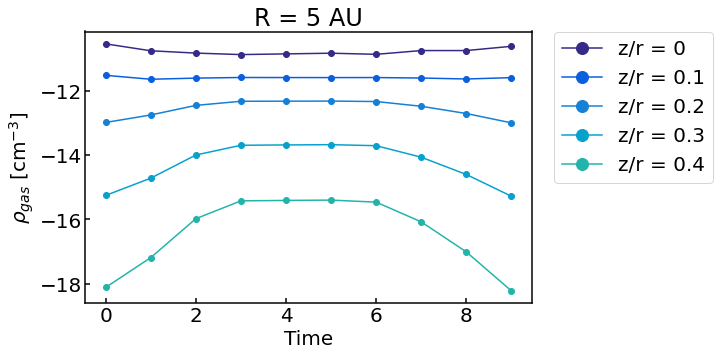

In [11]:
out = 4
r = 5
plt.figure(figsize=(8,5))
for k in range(5):
    temp = []
    for i in range(len(data_paths)):
        q = np.where(profiles['timestep{0:02d}_r'.format(i)] >= r)[0][0]
        #print('timestep{0:02d}_{1}_zr{2}'.format(i, outputs[out], zrs[k]))
        temp.append(profiles['timestep{0:02d}_{1}_zr{2}'.format(i, outputs[out], zrs[k])][q])
    plt.plot(np.arange(0,len(data_paths),1), temp, marker='o', c=parula[k*30],
             label='z/r = {}'.format(zrs[k]))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Time')
plt.title('R = {} AU'.format(r))
plt.ylabel(output_labels[out])
#plt.ylim(-20,8)

want z/H to be constant, not z/r

In [12]:
d = open_raw('/Users/arcticfox/Documents/disks/models/twhydrae/step_02/')
interp = open_interp('/Users/arcticfox/Documents/disks/models/twhydrae/step_02/')

In [13]:
path='/Users/arcticfox/Documents/disks/models/twhydrae/step_02/'
with open(path+'diskdata_raw.pkl', 'rb') as infile:
    diskinp = pickle.load(infile)
    ddustsm, ddustlg, tdustsm, tdustlg, dgas, tgas, re, ze = diskinp

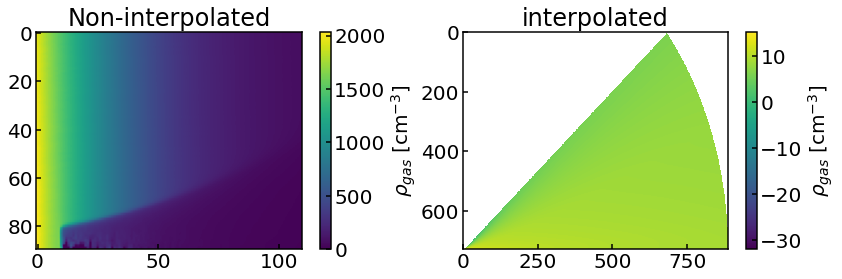

In [17]:
x = 4
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(14,4))
im = ax2.imshow(np.rot90(np.log10(interp[x])))#, vmin=-30, vmax=30)
plt.colorbar(im, ax=ax2, label=output_labels[x])
ax2.set_title('interpolated')

im1 = ax1.imshow(tdustsm.reshape(90,110))#, vmin=-30, vmax=30)
plt.colorbar(im1, ax=ax1, label=output_labels[x])
ax1.set_title('Non-interpolated')


#plt.colorbar()
plt.show()

In [ ]:
outputs

In [ ]:
t = '/Users/arcticfox/Documents/disks/models/herbig/bigdisk'
big = open_raw(t)

In [ ]:
plt.imshow(np.log10(big[4].reshape(90,110)))
plt.colorbar()